#Assignment 2

Penguin Classification Analysis
Problem Statement:
The Penguin Classification Analysis problem involves predicting the species of a penguin
based on various physical characteristics. The dataset includes information about the body
mass, culmen length, culmen depth, flipper length, and sex of different penguin species.
The problem is typically approached as a classification problem, where the target variable is
the penguin species, and the features are the physical characteristics of the penguins.
Accurate classification of penguin species can also help researchers understand the effects of
climate change and other environmental factors on penguin populations. The problem can
also be useful for conservation efforts, as it can help identify and protect endangered penguin
species.

Attribute Information:


* Species: penguin species (Chinstrap, Adélie, or Gentoo)
*   Island: island name (Dream, Torgersen, or Biscoe) in Antarctica
*   culmen_length_mm: culmen length (mm)
*   culmen_depth_mm: culmen depth (mm)
*   flipper_length_mm: flipper length (mm)
*   body_mass_g: body mass (g)
*   Sex: penguin sex





What is culmen?

The upper margin of the beak or bill is referred to as the culmen and the measurement is taken
using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the
first feathers depending on the standard chosen.

Perform the below Tasks to complete the Assignment:-
Clustering the data and performing classification algorithms
1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.
*  Univariate Analysis
*  Bi- Variate Analysis
*  Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding.
9. Split the data into dependent and independent variables.
10. Scaling the data
11. Split the data into training and testing
12. Build the Model
13. Train the Model
14. Test the Model
15. Measure the performance using Evaluation Me

In [16]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


In [17]:
# Load the dataset into the tool
df=pd.read_csv('/content/penguins_size.csv')

In [18]:
#read the dataset
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


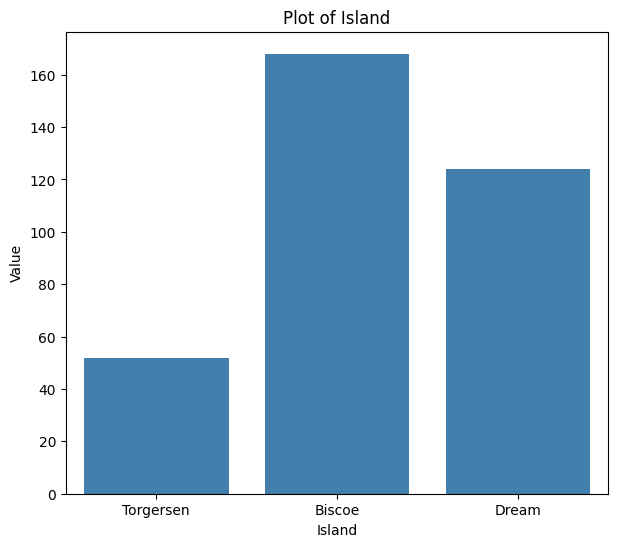

In [19]:
# Univariate Analysis
plt.figure(figsize=(7, 6))
sns.countplot(x='island', data=df)
plt.title('Plot of Island')
plt.xlabel('Island')
plt.ylabel('Value')
plt.grid(False)
plt.show()

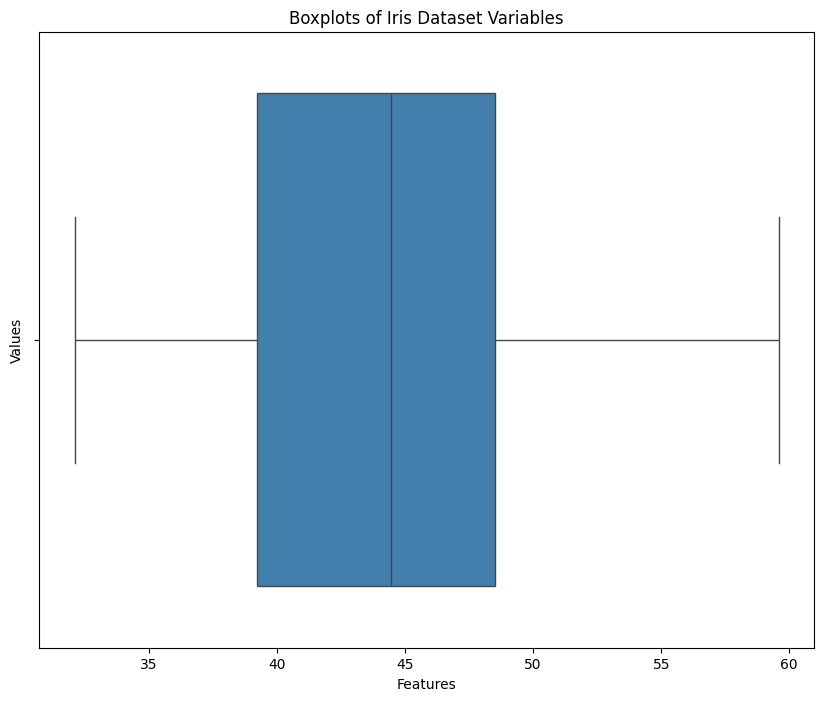

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='culmen_length_mm', data=df)
plt.title('Boxplots of Iris Dataset Variables')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

Text(0, 0.5, 'count of readings')

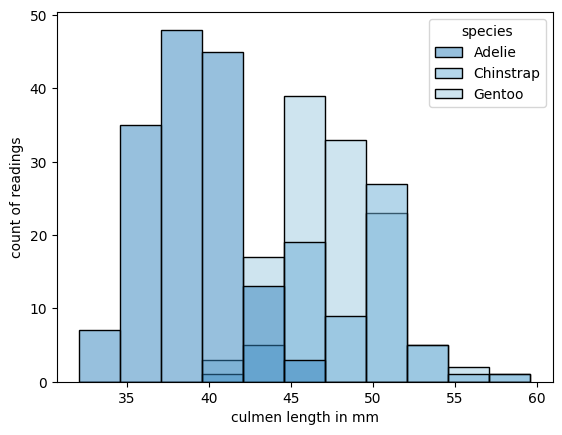

In [21]:
sns.histplot(data=df,x='culmen_length_mm',hue='species')
plt.xlabel("culmen length in mm")
plt.ylabel("count of readings")

Text(0, 0.5, 'count of readings')

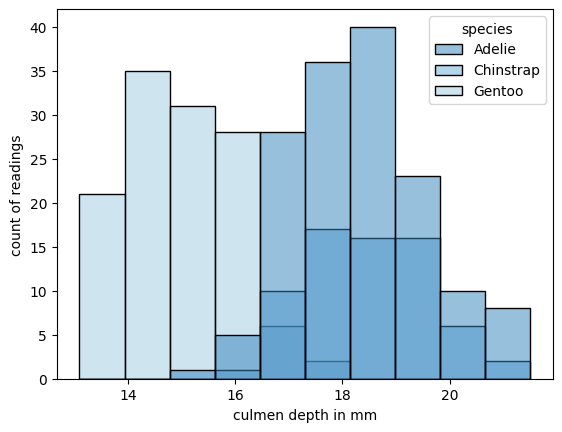

In [22]:
sns.histplot(data=df,x='culmen_depth_mm',hue='species')
plt.xlabel("culmen depth in mm")
plt.ylabel("count of readings")

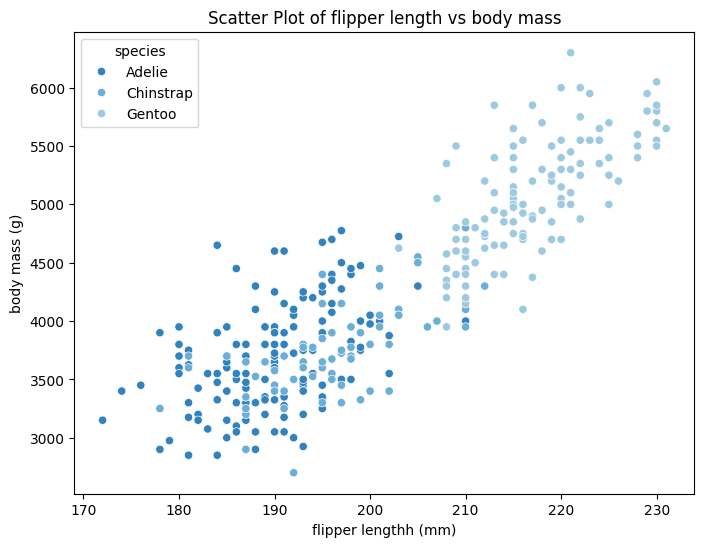

In [23]:
# Bi- Variate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Scatter Plot of flipper length vs body mass')
plt.xlabel('flipper lengthh (mm)')
plt.ylabel('body mass (g)')
plt.show()

Text(0, 0.5, 'culmen depth in mm')

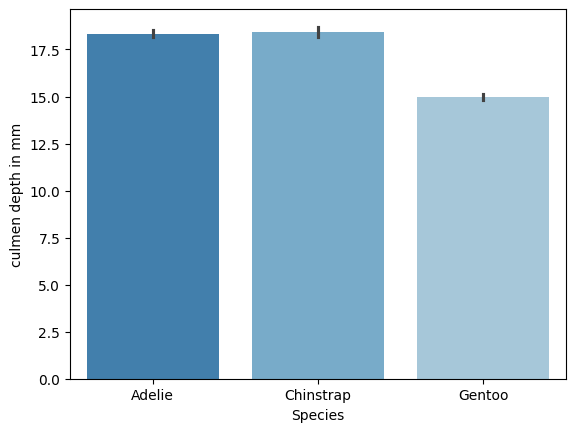

In [24]:
sns.barplot(data=df,x='species',y='culmen_depth_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("culmen depth in mm")

Text(0, 0.5, 'body mass in grams')

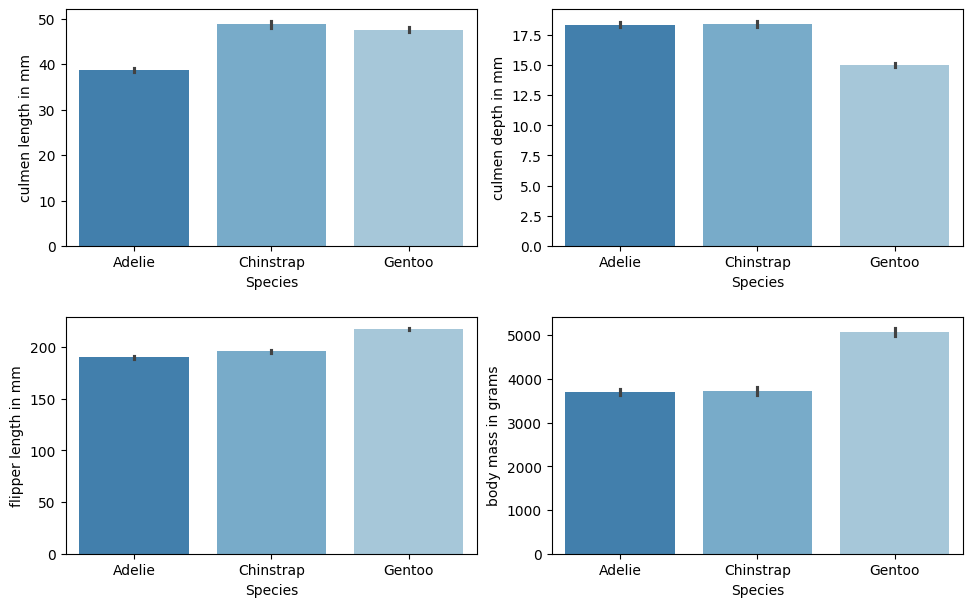

In [25]:
sns.set_palette('tab20c')
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.barplot(data=df,x='species',y='culmen_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("culmen length in mm")
plt.subplot(2,2,2)
sns.barplot(data=df,x='species',y='culmen_depth_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("culmen depth in mm")
plt.tight_layout(pad=2.0)
plt.subplot(2,2,3)
sns.barplot(data=df,x='species',y='flipper_length_mm',hue='species')
plt.xlabel("Species")
plt.ylabel("flipper length in mm")
plt.subplot(2,2,4)
sns.barplot(data=df,x='species',y='body_mass_g',hue='species')
plt.xlabel("Species")
plt.ylabel("body mass in grams")

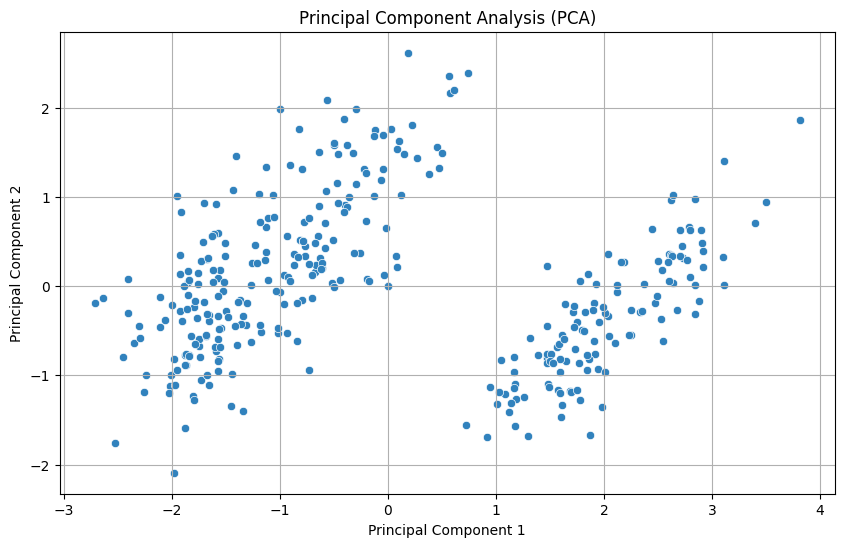

In [26]:
# Multi-Variate Analysis

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df.drop(['species', 'island', 'sex'], axis=1))  # Exclude non-numeric columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2')
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [28]:
# descriptive statistics on the dataset
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [29]:
# Check for Missing values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [30]:
#handling missing values by replacing with the mean
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())

In [31]:
#handling missing values by replacing with the mean
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

In [32]:
# checking the null rows of sex column
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN
10,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,NaN
11,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,NaN
47,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,NaN
246,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,NaN
286,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,NaN
324,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


In [33]:
#handling missing values by dropping values
df.dropna(subset=['sex'], inplace=True)

In [34]:
# recheck is there any null remaining
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

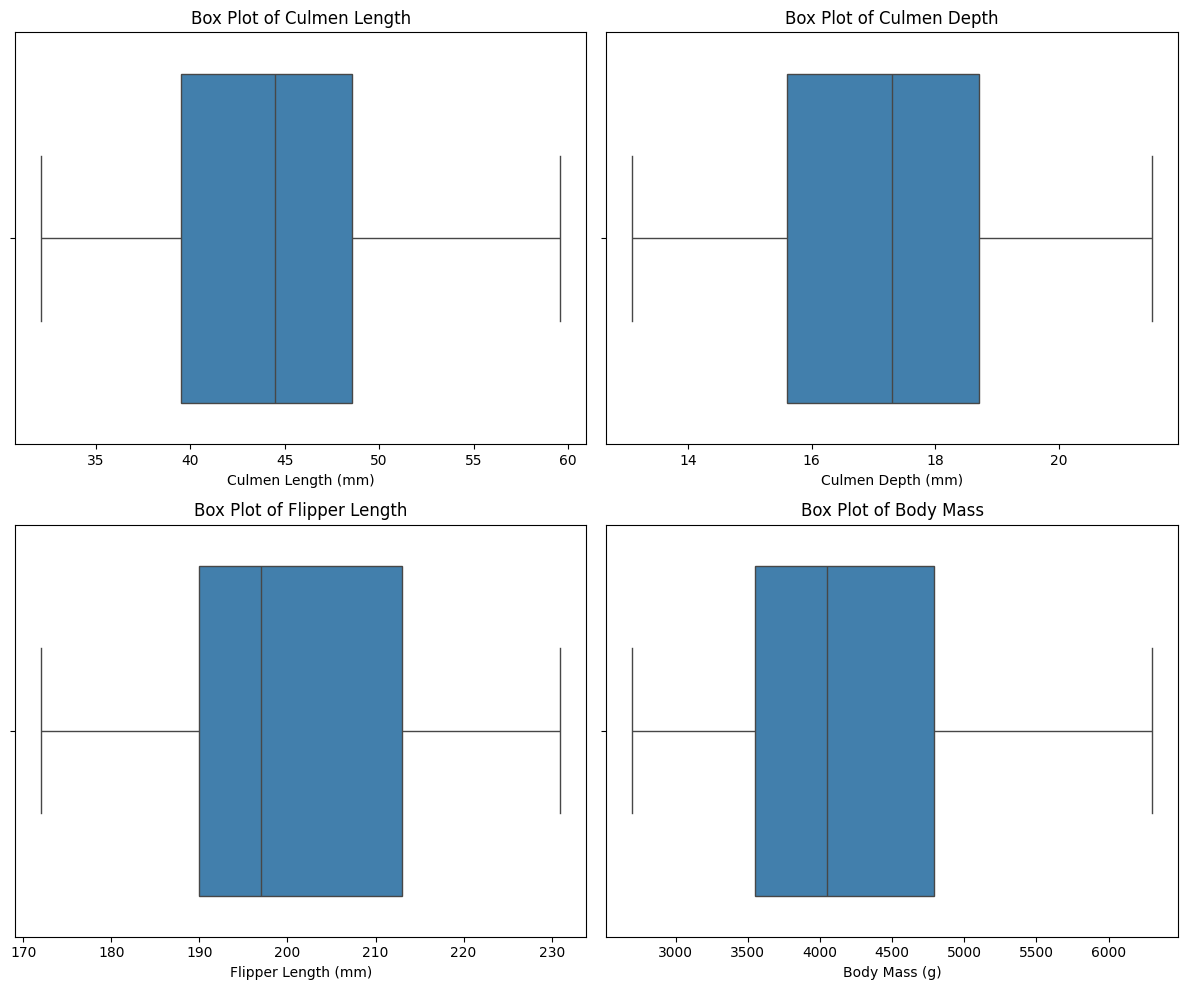

In [35]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['culmen_length_mm'])
plt.title('Box Plot of Culmen Length')
plt.xlabel('Culmen Length (mm)')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['culmen_depth_mm'])
plt.title('Box Plot of Culmen Depth')
plt.xlabel('Culmen Depth (mm)')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['flipper_length_mm'])
plt.title('Box Plot of Flipper Length')
plt.xlabel('Flipper Length (mm)')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['body_mass_g'])
plt.title('Box Plot of Body Mass')
plt.xlabel('Body Mass (g)')

plt.tight_layout()
plt.show()


In [36]:
#7. Check for Categorical columns and perform encoding.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [37]:
label_encoder = LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])
df['island']=label_encoder.fit_transform(df['island'])
df['sex']=label_encoder.fit_transform(df['sex'])

In [38]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    int64  
 1   island             334 non-null    int64  
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.9 KB


In [40]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [41]:
X = df.drop(columns=['species'])
y = df['species']

print(X.head())

print(y.head())

   island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2              39.1             18.7              181.0       3750.0   
1       2              39.5             17.4              186.0       3800.0   
2       2              40.3             18.0              195.0       3250.0   
4       2              36.7             19.3              193.0       3450.0   
5       2              39.3             20.6              190.0       3650.0   

   sex  
0    2  
1    1  
2    1  
4    1  
5    2  
0    0
1    0
2    0
4    0
5    0
Name: species, dtype: int64


In [42]:
scaler = StandardScaler()

In [43]:
X_scaled = scaler.fit_transform(X)

In [44]:
X_scaled

array([[ 1.89260388, -0.89765322,  0.78348666, -1.42952144, -0.57122888,
         0.98823488],
       [ 1.89260388, -0.82429023,  0.12189602, -1.07240838, -0.50901123,
        -0.98823488],
       [ 1.89260388, -0.67756427,  0.42724555, -0.42960487, -1.19340546,
        -0.98823488],
       ...,
       [-0.91063202,  1.17485108, -0.74326098,  1.49880565,  1.91747742,
         0.98823488],
       [-0.91063202,  0.22113229, -1.20128527,  0.78457953,  1.23308319,
        -0.98823488],
       [-0.91063202,  1.08314735, -0.53969463,  0.85600214,  1.48195382,
         0.98823488]])

In [45]:
# 11. split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

print("Training set X shape:", X_train.shape)
print("Training set y shape:", y_train.shape)
print("Testing set X shape:", X_test.shape)
print("Testing set y shape:", y_test.shape)


Training set X shape: (267, 6)
Training set y shape: (267,)
Testing set X shape: (67, 6)
Testing set y shape: (67,)


In [46]:
# 12. Build the Model
# Initialize the classifiers
dt_classifier = DecisionTreeClassifier(random_state=25)
rf_classifier = RandomForestClassifier(random_state=25)
knn_classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

In [47]:
# 13. Train the models on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [48]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=25)

In [49]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [50]:
# 14. Predict on the testing data

df_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)

In [51]:
#15. Measure the performance using Evaluation Metrics.
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}\n")

In [52]:
# Evaluate Decision Tree
evaluate_model(y_test, df_pred, "Decision Tree")

# Evaluate Random Forest Classifier
evaluate_model(y_test, rf_pred, "Random Forest Classifier")

# Evaluate K-Nearest Neighbors (KNN)
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors (KNN)")


Evaluation metrics for Decision Tree:
Accuracy: 0.9850746268656716
Precision: 0.9857235561323815
Recall: 0.9850746268656716
F1-score: 0.9850881646190814

Evaluation metrics for Random Forest Classifier:
Accuracy: 0.9850746268656716
Precision: 0.9856486796785305
Recall: 0.9850746268656716
F1-score: 0.9850296031156434

Evaluation metrics for K-Nearest Neighbors (KNN):
Accuracy: 0.9850746268656716
Precision: 0.9857853589196873
Recall: 0.9850746268656716
F1-score: 0.9851043438853516

